# MinMaxScaler for Unsupervised and Supervised Models

#### Using MinMaxScaler to scale the data before using unsupervised and supervised learning on the data to see if it provides a better model. 
<br>

#### Use 3+ supervised machine learning models covered in this class (remember the no free lunch theorem). Use SciKit Learn for this. You may use Tensorflow/Keras for neural networks models.
<br>

#### Use 3+ unsupervised machine learning models covered in this class.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_X = pd.read_csv('test_X.csv')
display(test_X)
test_y = pd.read_csv('test_y.csv')
display(test_y)
train_X = pd.read_csv('train_X.csv')
display(train_X)
train_y = pd.read_csv('train_y.csv')
display(train_y)
val_X = pd.read_csv('val_X.csv')
display(val_X)
val_y = pd.read_csv('val_y.csv')
display(val_y)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,208.519,220.315,199.020,0.00609,0.000030,0.00368,0.00339,0.01105,0.01761,0.155,...,0.01307,0.02855,0.00830,22.407,0.338097,0.712466,-6.471427,0.184378,2.502336,0.136390
1,179.711,225.930,144.878,0.00709,0.000040,0.00391,0.00419,0.01172,0.04313,0.442,...,0.03455,0.06892,0.07223,11.866,0.590951,0.745526,-4.379411,0.375531,3.671155,0.332086
2,203.184,211.526,196.160,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,0.085,...,0.00726,0.01403,0.00065,33.047,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539
3,174.688,240.005,74.287,0.01360,0.000080,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
4,110.453,127.611,105.554,0.00494,0.000040,0.00244,0.00315,0.00731,0.04128,0.379,...,0.03316,0.06688,0.02529,17.707,0.653427,0.706687,-5.333619,0.322044,2.631793,0.228319
5,115.380,123.109,108.634,0.00332,0.000030,0.00160,0.00199,0.00480,0.01503,0.137,...,0.01133,0.02436,0.00401,26.005,0.405991,0.761255,-5.966779,0.197938,1.974857,0.184067
6,244.990,272.210,239.170,0.00451,0.000020,0.00279,0.00237,0.00837,0.01897,0.181,...,0.01255,0.03253,0.01049,21.528,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220
7,171.041,208.313,75.501,0.00455,0.000030,0.00250,0.00234,0.00750,0.01966,0.186,...,0.01872,0.02666,0.01095,25.908,0.418622,0.720916,-6.183590,0.226278,2.589702,0.147403
8,198.383,215.203,193.104,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,0.111,...,0.00951,0.01919,0.00119,30.775,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
9,241.404,248.834,232.483,0.00281,0.000010,0.00157,0.00173,0.00470,0.01760,0.154,...,0.01251,0.03017,0.00675,23.145,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399


,status
0,1
1,1
2,0
3,0
4,1
5,0
6,0
7,1
8,0
9,0


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,237.226,247.326,225.227,0.00298,0.00001,0.00169,0.00182,0.00507,0.01752,0.164,...,0.01133,0.03104,0.00740,22.736,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032
1,128.451,150.449,75.632,0.01551,0.00012,0.00905,0.00909,0.02716,0.06170,0.584,...,0.05174,0.09669,0.11843,15.060,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
2,237.226,247.326,225.227,0.00298,0.00001,0.00169,0.00182,0.00507,0.01752,0.164,...,0.01133,0.03104,0.00740,22.736,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032
3,116.342,581.289,94.246,0.00267,0.00002,0.00115,0.00148,0.00345,0.01300,0.117,...,0.01144,0.01892,0.00680,25.023,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868
4,116.556,592.030,86.228,0.00496,0.00004,0.00254,0.00263,0.00762,0.01660,0.154,...,0.01491,0.02460,0.01397,23.958,0.566424,0.667654,-6.431119,0.153310,2.161936,0.120605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,222.236,231.345,205.495,0.00266,0.00001,0.00152,0.00144,0.00457,0.01643,0.145,...,0.01200,0.02602,0.00340,25.856,0.364867,0.694399,-6.966321,0.095882,2.278687,0.103224
172,240.301,245.135,219.783,0.00517,0.00002,0.00316,0.00283,0.00949,0.02018,0.212,...,0.01344,0.03529,0.00965,21.020,0.371837,0.646167,-7.169701,0.073298,2.266432,0.100881
173,115.322,135.738,107.802,0.00619,0.00005,0.00352,0.00329,0.01057,0.03273,0.325,...,0.02931,0.04933,0.02810,19.388,0.577802,0.684373,-5.283009,0.226528,2.442906,0.238281
174,126.344,134.231,112.773,0.00448,0.00004,0.00131,0.00169,0.00393,0.02033,0.185,...,0.01614,0.03429,0.00474,25.030,0.507504,0.760361,-6.689151,0.291954,2.431854,0.105993


,status
0,0
1,1
2,0
3,0
4,0
...,...
171,0
172,0
173,1
174,0


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,110.417,131.067,103.370,0.00784,0.000070,0.00352,0.00514,0.01056,0.03715,0.334,...,0.02802,0.06097,0.00969,21.422,0.541781,0.821364,-4.438453,0.238298,1.922940,0.335041
1,116.848,217.552,99.503,0.00531,0.000050,0.00260,0.00346,0.00780,0.01795,0.163,...,0.01756,0.02429,0.01179,22.085,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
2,95.385,102.145,90.264,0.00608,0.000060,0.00331,0.00332,0.00994,0.03202,0.263,...,0.02455,0.05408,0.01062,21.875,0.644954,0.779612,-5.115212,0.249494,2.017753,0.260015
3,240.301,245.135,219.783,0.00517,0.000020,0.00316,0.00283,0.00949,0.02018,0.212,...,0.01344,0.03529,0.00965,21.020,0.371837,0.646167,-7.169701,0.073298,2.266432,0.100881
4,122.188,128.611,115.765,0.00524,0.000040,0.00169,0.00203,0.00507,0.01613,0.143,...,0.01433,0.02566,0.00839,23.162,0.579597,0.733659,-6.439398,0.266392,2.079922,0.133867
5,115.380,123.109,108.634,0.00332,0.000030,0.00160,0.00199,0.00480,0.01503,0.137,...,0.01133,0.02436,0.00401,26.005,0.405991,0.761255,-5.966779,0.197938,1.974857,0.184067
6,128.940,479.697,88.251,0.00581,0.000050,0.00241,0.00314,0.00723,0.02008,0.221,...,0.01734,0.02548,0.02350,24.743,0.487756,0.684130,-6.186128,0.279933,2.686240,0.152428
7,116.848,217.552,99.503,0.00531,0.000050,0.00260,0.00346,0.00780,0.01795,0.163,...,0.01756,0.02429,0.01179,22.085,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
8,114.847,271.314,104.680,0.00867,0.000080,0.00373,0.00520,0.01120,0.03225,0.350,...,0.02519,0.05414,0.01143,21.660,0.547975,0.817396,-4.609161,0.221711,1.831691,0.316395
9,183.520,216.814,161.340,0.01466,0.000080,0.00849,0.00819,0.02546,0.06050,0.618,...,0.06359,0.08595,0.06057,14.367,0.478024,0.768974,-4.276605,0.355736,3.142364,0.336085


,status
0,1
1,0
2,1
3,0
4,0
5,0
6,1
7,0
8,1
9,1


array([[0.90720927, 0.29612742, 0.91972665, ..., 0.20794698, 0.52449534,
        0.10457761],
       [0.24444011, 0.09830823, 0.05847064, ..., 0.68409726, 0.64139399,
        0.64690117],
       [0.90720927, 0.29612742, 0.91972665, ..., 0.20794698, 0.52449534,
        0.10457761],
       ...,
       [0.16444474, 0.06826893, 0.24368142, ..., 0.49582301, 0.53825663,
        0.40126505],
       [0.2316021 , 0.06519169, 0.27230071, ..., 0.64310622, 0.53242228,
        0.12727928],
       [0.90095782, 0.29068967, 0.21106659, ..., 0.37368055, 0.4286071 ,
        0.15556886]])

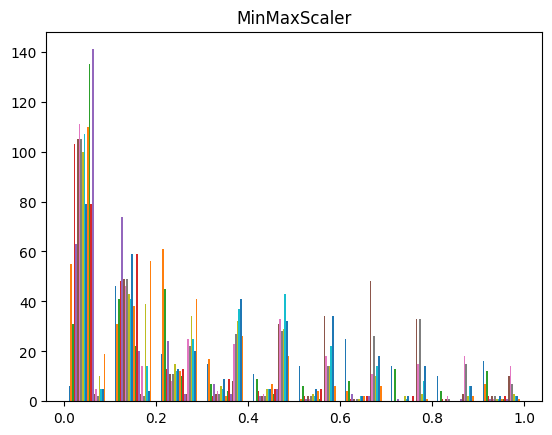

In [3]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
X_train_mm = minmax_scaler.fit_transform(train_X)
X_val_mm = minmax_scaler.transform(val_X)
X_test_mm = minmax_scaler.transform(test_X)
display(X_train_mm)

plt.hist(X_train_mm)
plt.title('MinMaxScaler')
plt.show()

In [4]:
#use the isolation forest model to search for anomalies on the scaled/transformed data
from sklearn.ensemble import IsolationForest

df = pd.concat([train_X, train_y], axis=1)

# create the model
clf = IsolationForest(random_state=42, contamination=0.01)
#clf = IsolationForest(random_state=42, contamination=0.02)
anomaly_threshold = -0.5

# Fit the model to the MinMaxScaler data
clf.fit(X_train_mm)

# create a column for the predictions of the MinMaxScaler data
df['anomaly_score'] = clf.decision_function(X_train_mm)
df['outlier'] = clf.predict(X_train_mm)
mm_anomaly_test = clf.decision_function(X_test_mm)
mm_anomalies_test = mm_anomaly_test < anomaly_threshold
mm_anomaly_val = clf.decision_function(X_val_mm)
mm_anomalies_val = mm_anomaly_val < anomaly_threshold
mm_train_out = df.loc[df['outlier'] == -1].index

# show the number of outliers for the MinMaxScaler data
print('MinMaxScaler')
print(df['outlier'].value_counts())
print(mm_anomalies_test)
print(mm_anomalies_val)
display(df.loc[df['outlier'] == -1])

MinMaxScaler
outlier
 1    174
-1      2
Name: count, dtype: int64
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status,anomaly_score,outlier
73,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,1.302,...,8.441,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367,1,-0.043991,-1
151,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,0.930,...,10.489,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774,1,-0.032702,-1


In [5]:
# Remove the outliers for each type of scaled/transformed data
X_train_no_outliers_mm = np.delete(X_train_mm, mm_train_out, axis=0)
y_train_no_outliers_mm = np.delete(train_y, mm_train_out)

display(X_train_no_outliers_mm)
display(y_train_no_outliers_mm)

array([[0.90720927, 0.29612742, 0.91972665, ..., 0.20794698, 0.52449534,
        0.10457761],
       [0.24444011, 0.09830823, 0.05847064, ..., 0.68409726, 0.64139399,
        0.64690117],
       [0.90720927, 0.29612742, 0.91972665, ..., 0.20794698, 0.52449534,
        0.10457761],
       ...,
       [0.16444474, 0.06826893, 0.24368142, ..., 0.49582301, 0.53825663,
        0.40126505],
       [0.2316021 , 0.06519169, 0.27230071, ..., 0.64310622, 0.53242228,
        0.12727928],
       [0.90095782, 0.29068967, 0.21106659, ..., 0.37368055, 0.4286071 ,
        0.15556886]])

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0])

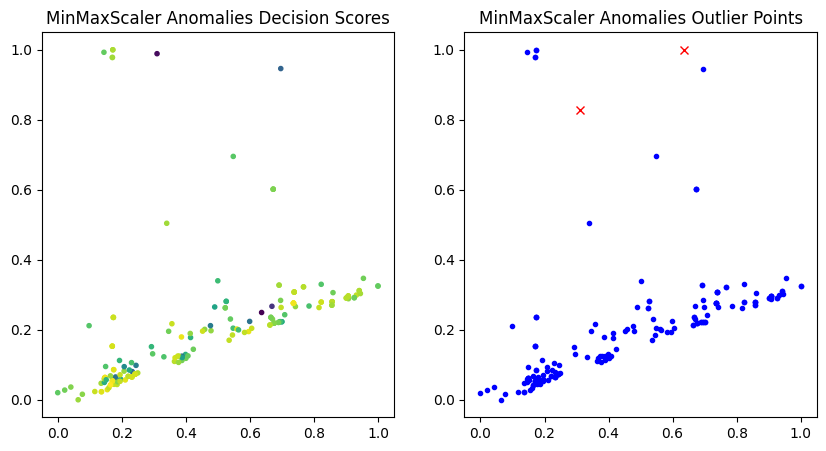

,Inlier Label,Inline Score,Outlier Label,Outline Score
0,1.0,0.295097,-1.0,-0.043991
1,1.0,0.112704,-1.0,-0.032702


In [6]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))

clf.fit(X_train_mm)
predictions_mm = clf.predict(X_train_mm)

ax1.scatter(X_train_mm[:, 0], X_train_mm[:, 1], c=clf.decision_function(X_train_mm), marker='.')
ax1.set_title('MinMaxScaler Anomalies Decision Scores')
ax2.plot(X_train_mm[predictions_mm==1][:,0], X_train_mm[predictions_mm==1][:,1], 'b.')
ax2.plot(X_train_mm[predictions_mm==-1][:,0], X_train_mm[predictions_mm==-1][:,-1], 'rx')
ax2.set_title('MinMaxScaler Anomalies Outlier Points')

plt.show()

df = pd.DataFrame(dict(predicted_label=clf.predict(X_train_mm), score=clf.decision_function(X_train_mm)))
outliers = df[df['predicted_label'] == -1].values
inliers = df[df['predicted_label'] == 1].head(len(outliers)).values
mm_scores = pd.DataFrame(np.concatenate([inliers, outliers], axis=1), 
             columns=['Inlier Label', 'Inline Score', 'Outlier Label', 'Outline Score'])
display(mm_scores)

## PCA for Dimensionality Reduction - MinMaxScaler

Component 1: Explained Variance 0.47571084103016903
Component 2: Explained Variance 0.663910417253801
Component 3: Explained Variance 0.7643440605055841
Component 4: Explained Variance 0.8248352343383275
Component 5: Explained Variance 0.8690357695266085
Component 6: Explained Variance 0.9053942625567978
Component 7: Explained Variance 0.9380788723952941
Component 8: Explained Variance 0.9566666890346611
Component 9: Explained Variance 0.9716390290997273
Component 10: Explained Variance 0.9858618684307547
Component 11: Explained Variance 0.9920851651796324
Component 12: Explained Variance 0.9953046471919094
Component 13: Explained Variance 0.9972017684756458
Component 14: Explained Variance 0.9983054784738108
Component 15: Explained Variance 0.9988849243476191
Component 16: Explained Variance 0.9993698688235133
Component 17: Explained Variance 0.9996735298115909
Component 18: Explained Variance 0.9998568706582474
Component 19: Explained Variance 0.9999733237215561
Component 20: Explain

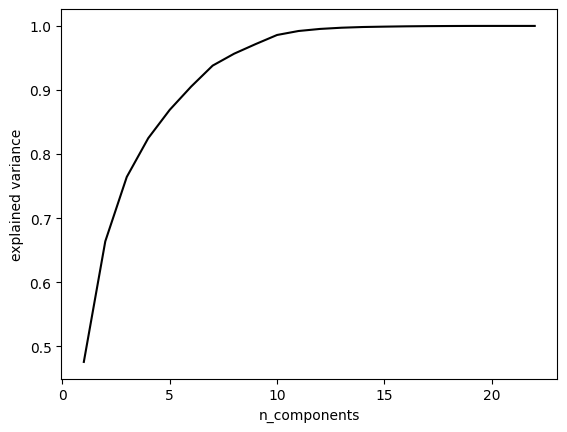

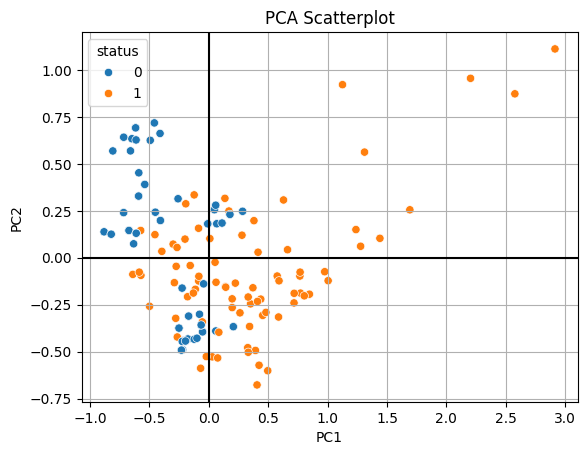

In [7]:
#use principal component analysis to determine catagories for the data
from sklearn.decomposition import PCA


#test n_number of components to find the best fit for the data
n_components = np.arange(1, 23)
models = [PCA(n).fit(X_train_mm) for n in n_components]

#plot the explained variance ratio for each number of components
plt.plot(n_components, [m.explained_variance_ratio_.sum() for m in models], color='black')
for i, model in enumerate(models):
    explained_variance = model.explained_variance_ratio_.sum()
    print(f'Component {n_components[i]}: Explained Variance {explained_variance}')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()


#create the model
pca = PCA(n_components = 2)

#fit the model and transform the data
transformed = pca.fit_transform(X_train_mm)

#create a dataframe of the transformed data
df_mm = pd.DataFrame(transformed, columns=['PC1', 'PC2'])
df_mm['status'] = train_y

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='status', data=df_mm)

#make title
plt.title('PCA Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()

## PCA for Dimensionality Reduction - MinMaxScaler Outliers Removed

Component 1: Explained Variance 0.43376404896025866
Component 2: Explained Variance 0.6283002967873912
Component 3: Explained Variance 0.738936134314841
Component 4: Explained Variance 0.8072819134538634
Component 5: Explained Variance 0.8517826418167056
Component 6: Explained Variance 0.8933065854694887
Component 7: Explained Variance 0.9312021347316541
Component 8: Explained Variance 0.9527069638887814
Component 9: Explained Variance 0.9697676766834502
Component 10: Explained Variance 0.9857699856208956
Component 11: Explained Variance 0.9927273618705308
Component 12: Explained Variance 0.9951512897389191
Component 13: Explained Variance 0.997086491307695
Component 14: Explained Variance 0.9982598810228519
Component 15: Explained Variance 0.9988370139776525
Component 16: Explained Variance 0.9993950604500048
Component 17: Explained Variance 0.9997062352138829
Component 18: Explained Variance 0.9998642273743379
Component 19: Explained Variance 0.999975113401919
Component 20: Explained

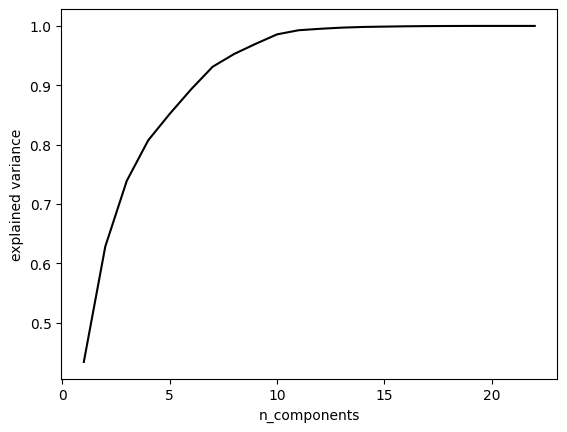

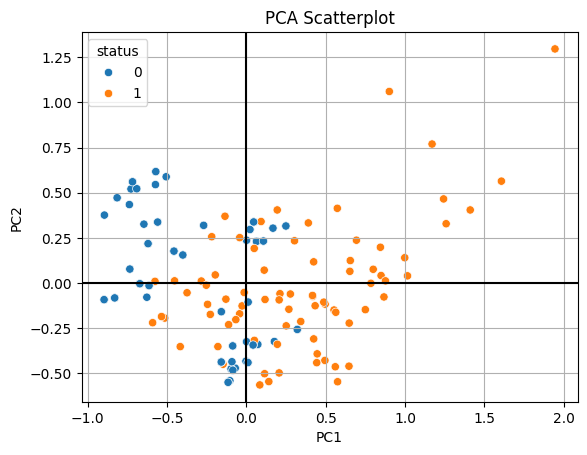

In [8]:
#use principal component analysis to determine catagories for the data
from sklearn.decomposition import PCA


#test n_number of components to find the best fit for the data
n_components = np.arange(1, 23)
models = [PCA(n).fit(X_train_no_outliers_mm) for n in n_components]

#plot the explained variance ratio for each number of components
plt.plot(n_components, [m.explained_variance_ratio_.sum() for m in models], color='black')
for i, model in enumerate(models):
    explained_variance = model.explained_variance_ratio_.sum()
    print(f'Component {n_components[i]}: Explained Variance {explained_variance}')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()


#create the model
pca = PCA(n_components = 2)

#fit the model and transform the data
transformed = pca.fit_transform(X_train_no_outliers_mm)

#create a dataframe of the transformed data
df_mm_no = pd.DataFrame(transformed, columns=['PC1', 'PC2'])
df_mm_no['status'] = y_train_no_outliers_mm

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='status', data=df_mm_no)

#make title
plt.title('PCA Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()

There was more variance explained in less components with the RobustScaler or PowerTransformer data. Those will be used for further analysis instead of MinMaxScaler.